In [3]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
train_df = pd.read_csv('./new_train.csv')
train_df = train_df.select_dtypes(['number'])
train_df = train_df.fillna(train_df.mean())
test_df = pd.read_csv('./new_test.csv')
test_df = test_df.select_dtypes(['number'])
test_df = test_df.fillna(test_df.mean())
test_df.head()
print(train_df.isnull().sum())

# Find missing values
for i, r in train_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()


for i, r in test_df.iterrows():
    if r.isnull().sum() > 0:
        print(i)
        print(r)
        print()


MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


[[117231.94551114]
 [152583.27159044]
 [173046.80259054]
 [199965.15438838]
 [195155.99136516]
 [182382.47732735]
 [199510.55890442]
 [171572.02236665]
 [207585.53538793]
 [113694.70005096]]
Accuracy (R^2): 0.7678875554929404


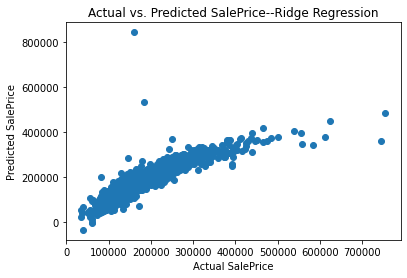

In [4]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt

# Create Ridge Regression model
ridge_regr = Ridge(alpha=1.0)  # You can specify the alpha value for Ridge regularization

# Prepare the training data
x_train = train_df.drop(['SalePrice'], axis=1)
y_train = train_df[['SalePrice']]

# Fit Ridge Regression model to training data
ridge_regr.fit(x_train, y_train)

# Make predictions on test data
predictions = ridge_regr.predict(test_df)

# Print first ten predictions
print(predictions[0:10])

# Perform 6-fold cross-validation
scores = cross_val_score(ridge_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)

# Make cross-validated predictions
predictions = cross_val_predict(ridge_regr, train_df.drop(['SalePrice'], axis=1), train_df[['SalePrice']], cv=6)

# Plot actual vs. predicted sale prices
plt.scatter(train_df[['SalePrice']], predictions)
plt.title("Actual vs. Predicted SalePrice--Ridge Regression")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")

# Get accuracy of model from cross-validation
accuracy = metrics.r2_score(train_df[['SalePrice']], predictions)
print("Accuracy (R^2):", accuracy)
